# Import Libraries

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [ ]:
df = pd.read_csv('concatenated_data.csv')
df.head()

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,day
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,True,1400.0,7.0,5.628882e+07,5.376503e+06,0.020885,0.214286,5.803571e+07,0.183350,1
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,False,1400.0,9.0,1.448893e+07,2.624299e+03,0.000253,0.142857,8.125000e+07,0.000008,1
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,False,1400.0,4.0,4.619858e+06,2.142543e+02,0.000044,0.142857,1.142857e+08,0.000146,1
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,True,1400.0,6.0,7.812001e+07,1.937496e+03,0.189714,0.071429,5.803571e+07,0.028831,1
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,False,1400.0,9.0,8.155186e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000224,1


#  Data Exploration and Visualiztion  (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cell_id     2565 non-null   int64  
 1   cell_x      2565 non-null   float64
 2   cell_y      2565 non-null   float64
 3   cell_z      2565 non-null   float64
 4   feature_1   2565 non-null   float64
 5   feature_2   2565 non-null   float64
 6   feature_3   2565 non-null   float64
 7   feature_4   2565 non-null   float64
 8   feature_5   2565 non-null   float64
 9   feature_6   2565 non-null   float64
 10  feature_7   2565 non-null   float64
 11  feature_8   2565 non-null   float64
 12  feature_9   2565 non-null   float64
 13  feature_10  2565 non-null   float64
 14  feature_11  2565 non-null   bool   
 15  feature_12  2565 non-null   float64
 16  feature_13  2565 non-null   float64
 17  feature_14  2565 non-null   float64
 18  feature_15  2565 non-null   float64
 19  feature_16  2565 non-null  

In [ ]:
df.describe()

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,day
count,2565.000000,2.565000e+03,2.565000e+03,2565.000000,2565.000000,2.565000e+03,2.565000e+03,2.565000e+03,2565.000000,2565.000000,...,2565.000000,2565.000000,2565.000000,2.565000e+03,2.565000e+03,2565.000000,2565.000000,2.565000e+03,2565.000000,2565.000000
mean,85.000000,4.538609e-14,-1.659429e-13,46.631579,0.690058,2.822317e+07,3.231099e+07,2.653071e+07,1468.568506,0.420605,...,0.030505,1594.186109,6.046004,2.821992e+07,7.486606e+05,0.014142,0.144848,8.452381e+07,0.014142,8.000000
std,49.372229,1.573771e+03,1.573771e+03,9.316268,1.072380,2.753309e+07,2.128249e+07,3.079340e+07,798.110056,0.453184,...,0.103379,169.237999,3.475935,2.752826e+07,2.106412e+06,0.037107,0.108867,2.308485e+07,0.034476,4.321336
min,0.000000,-2.800000e+03,-2.424871e+03,30.000000,0.000000,1.980031e+03,9.659600e+03,7.137173e+02,242.178160,0.000014,...,0.000000,1400.000000,1.000000,1.980031e+03,0.000000e+00,0.000000,-0.107143,5.803571e+07,0.000000,1.000000
25%,42.000000,-1.400000e+03,-1.212436e+03,36.000000,0.000000,1.627090e+06,1.675829e+07,6.599113e+05,804.550222,0.094866,...,0.000010,1400.000000,3.000000,1.627090e+06,2.257099e+02,0.000013,0.071429,5.803571e+07,0.000018,4.000000
50%,85.000000,4.733991e-13,0.000000e+00,48.000000,0.000000,1.911109e+07,2.501149e+07,1.402415e+07,1374.593864,0.229859,...,0.000100,1604.974226,6.000000,1.911107e+07,3.160310e+03,0.000053,0.142857,8.125000e+07,0.000086,8.000000
75%,128.000000,1.400000e+03,1.212436e+03,54.000000,1.000000,5.390494e+07,4.740402e+07,4.644571e+07,1931.042295,0.637046,...,0.000286,1809.948452,9.000000,5.390417e+07,7.599190e+03,0.000939,0.232143,1.142857e+08,0.013146,12.000000
max,170.000000,2.800000e+03,2.424871e+03,60.000000,3.000000,1.001178e+08,8.944047e+07,1.406810e+08,4211.536154,2.420182,...,1.000000,1809.948452,12.000000,1.001158e+08,1.581616e+07,0.461036,0.392857,1.142857e+08,0.346937,15.000000


# Visualization

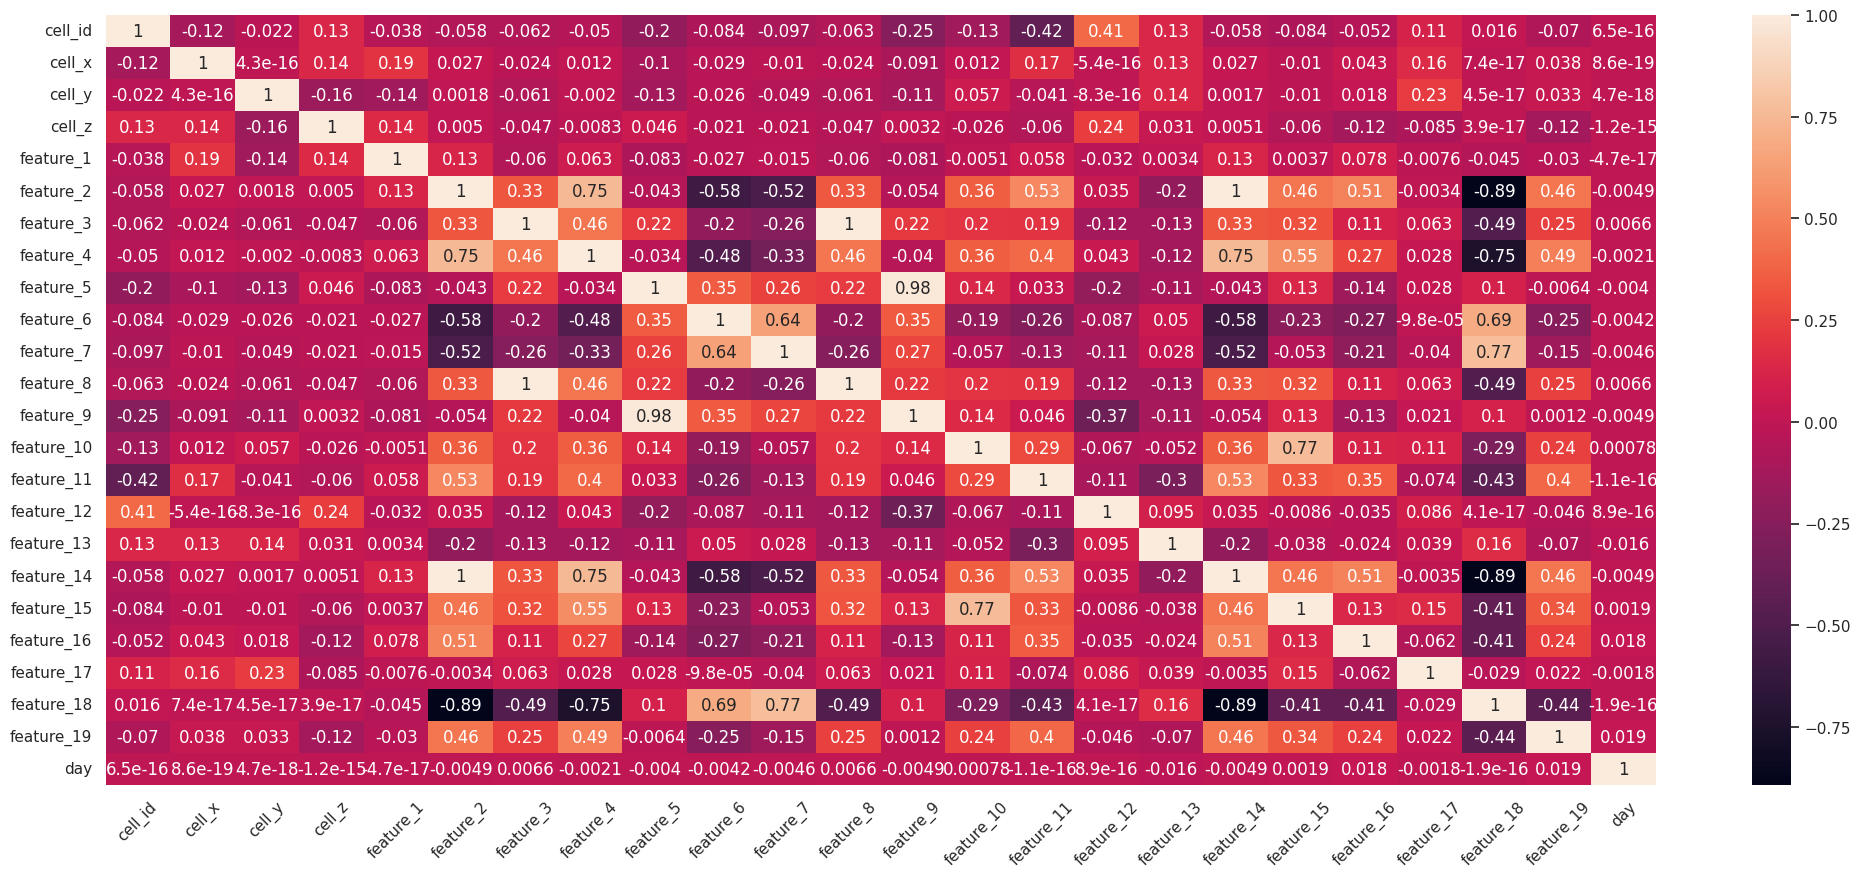

In [ ]:
sns.set(rc={'figure.figsize': (25, 10)})
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

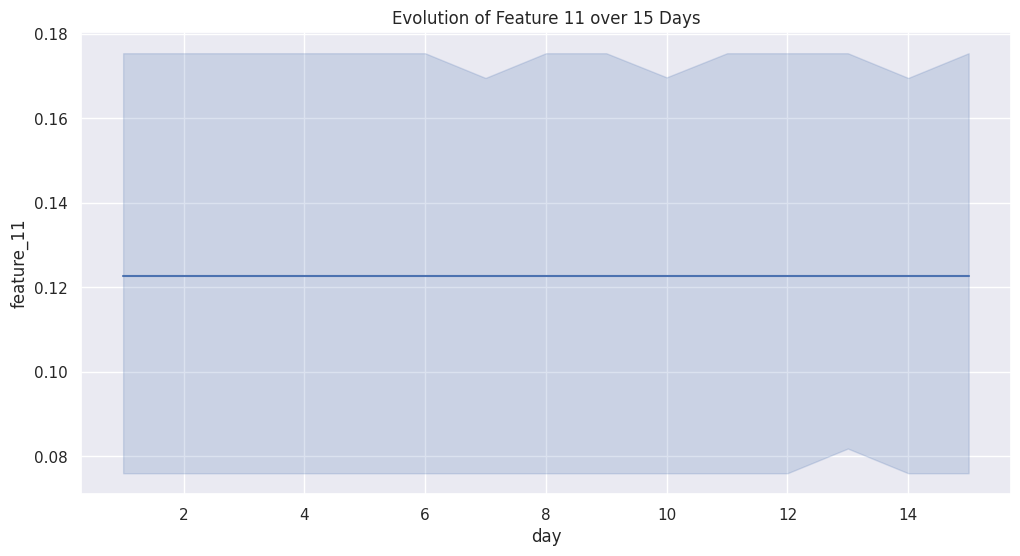

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='feature_11', data=df)
plt.title('Evolution of Feature 11 over 15 Days')
plt.show()

**Positive correlation:**

Feature 2 and Feature 4: These features appear to have a very strong positive correlation, as indicated by the dark red square in the corresponding cell.

Feature 2 and Feature 3: There is also a strong positive correlation between these two features.

Feature 3 and Feature 4: Similar to the previous pairs, Feature 3 and Feature 4 show a strong positive correlation.

Feature 1 and Feature 15: A moderately strong positive correlation exists between Feature 1 and Feature 15.

**Negative correlation:**

Feature 6 and Feature 10: A strong negative correlation is observed between Feature 6 and Feature 10, indicated by the dark blue square.

Feature 6 and Feature 11: Another strong negative correlation exists between Feature 6 and Feature 11.

Feature 7 and Feature 11: A moderately strong negative correlation is seen between Feature 7 and Feature 11.

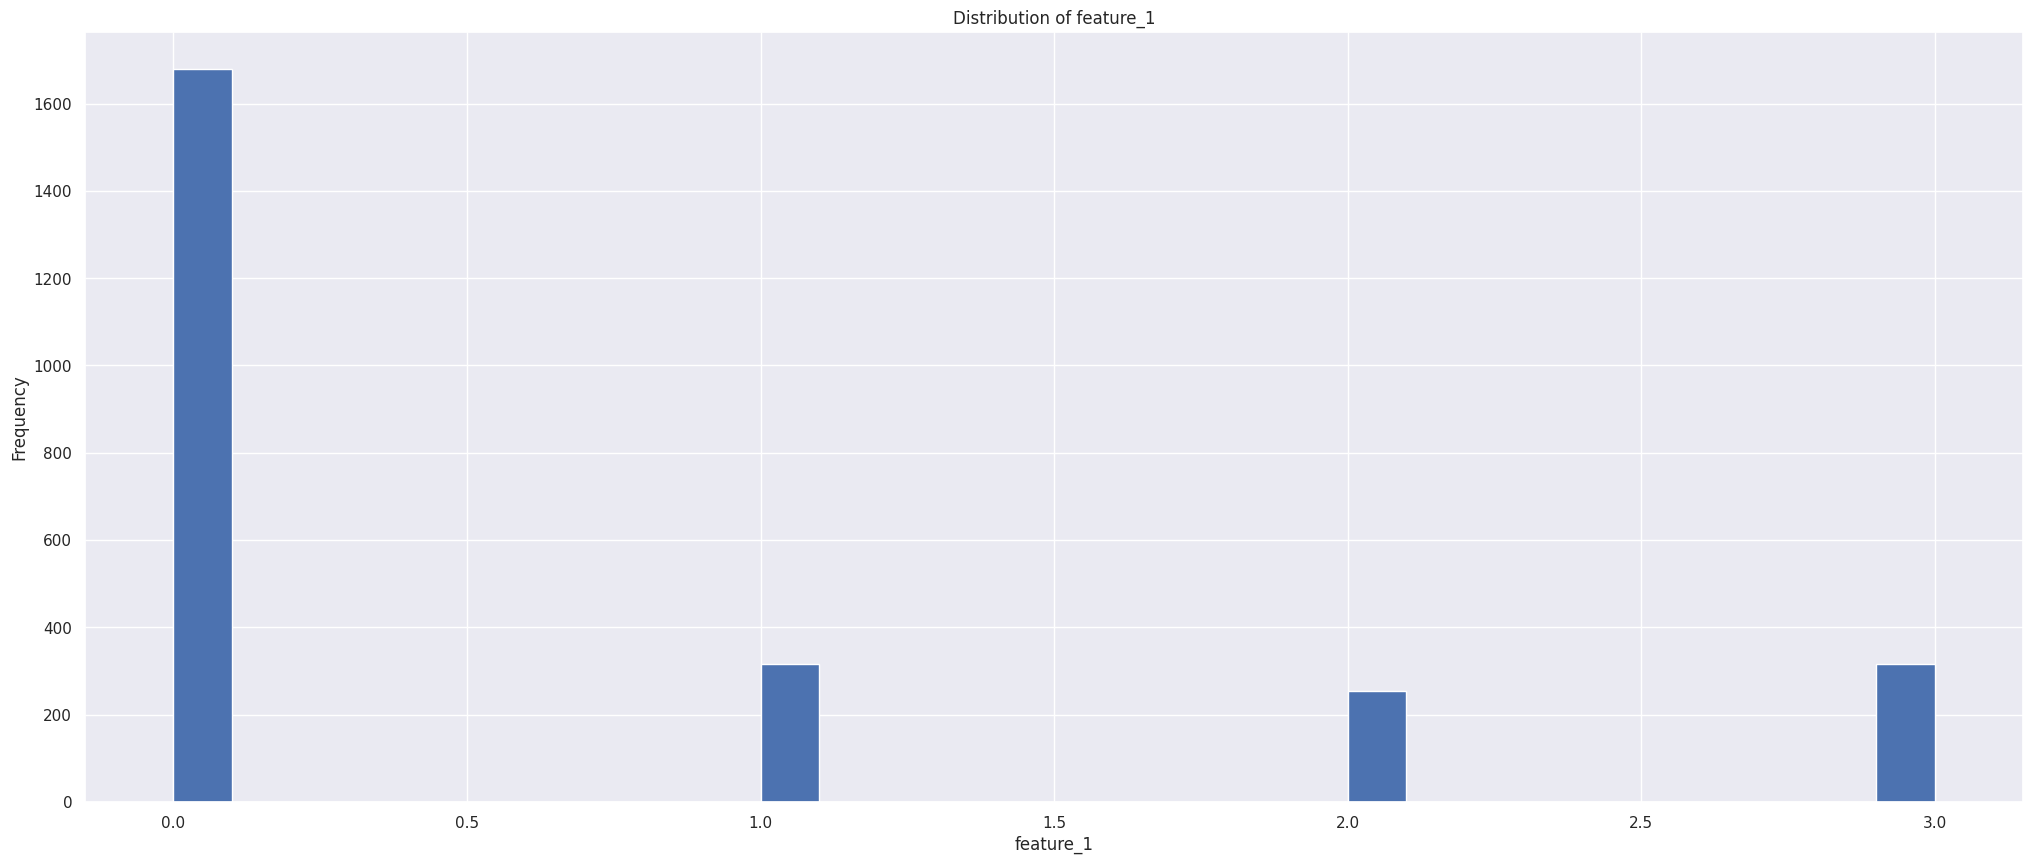

In [ ]:
#How is the distribution of feature_1 in the dataset
plt.hist(df['feature_1'], bins=30)
plt.xlabel('feature_1')
plt.ylabel('Frequency')
plt.title('Distribution of feature_1')
plt.show()

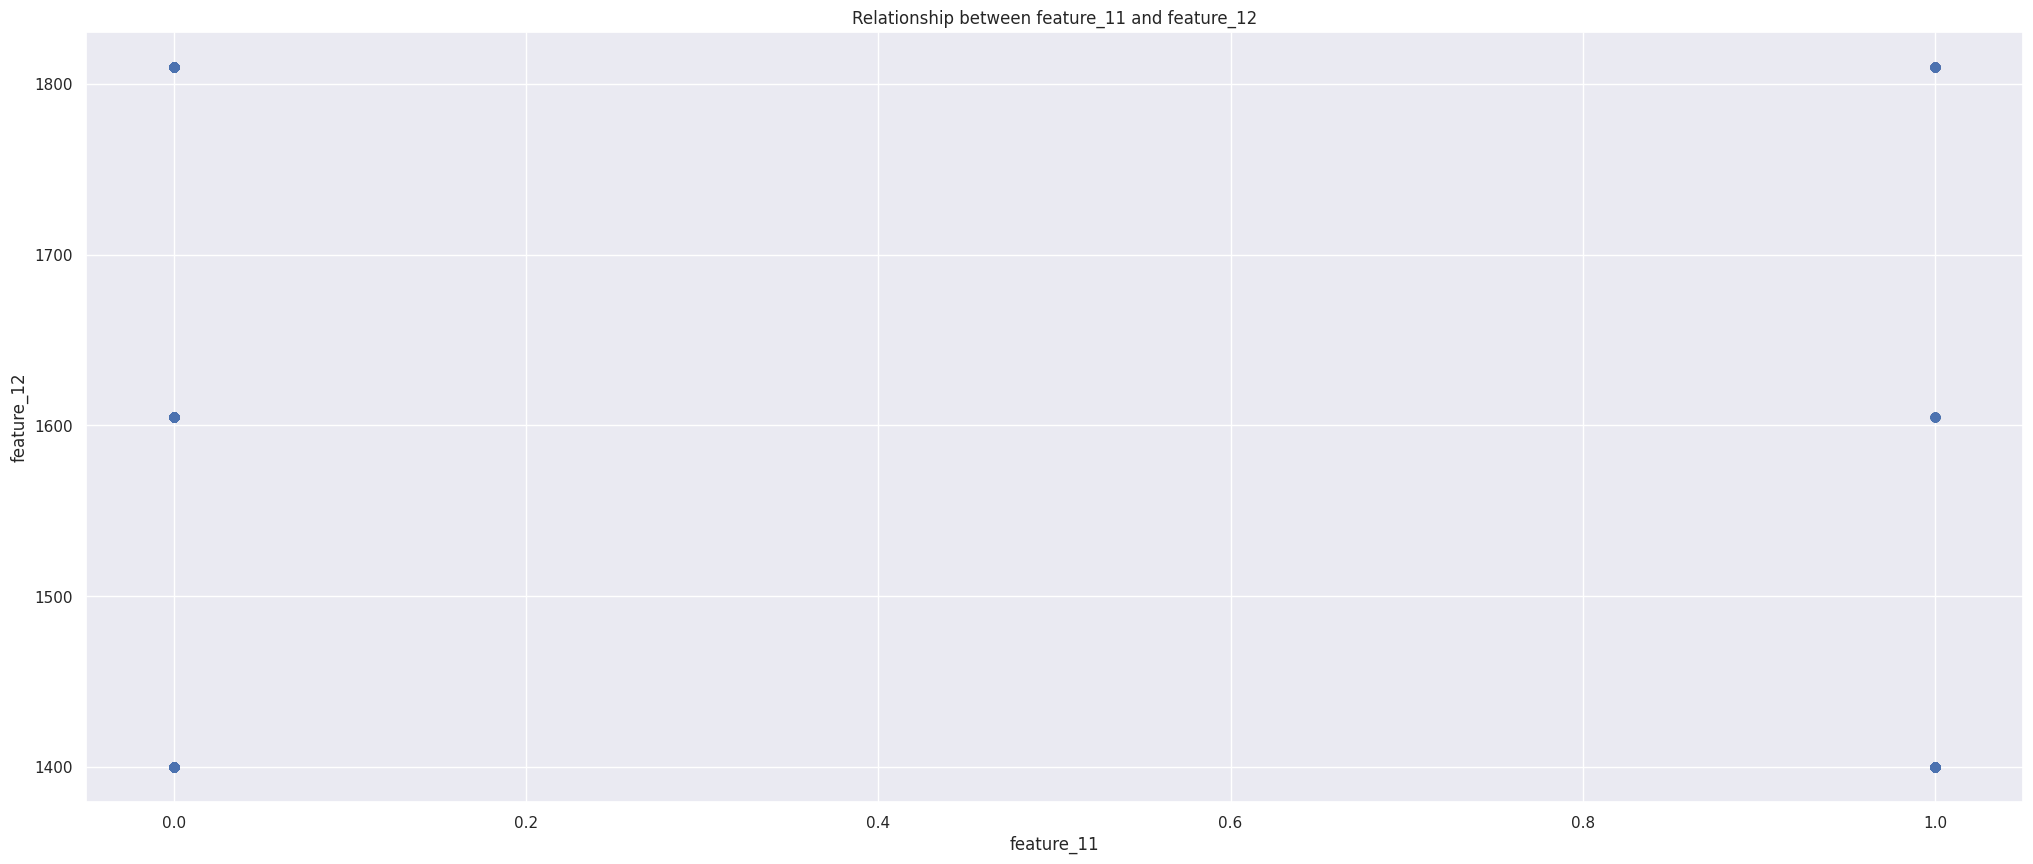

In [ ]:
# Is there any relationship between feature_11 and feature_12?
plt.scatter(df['feature_11'], df['feature_12'])
plt.xlabel('feature_11')
plt.ylabel('feature_12')
plt.title('Relationship between feature_11 and feature_12')
plt.show()

# i think no relationship between 2 features.

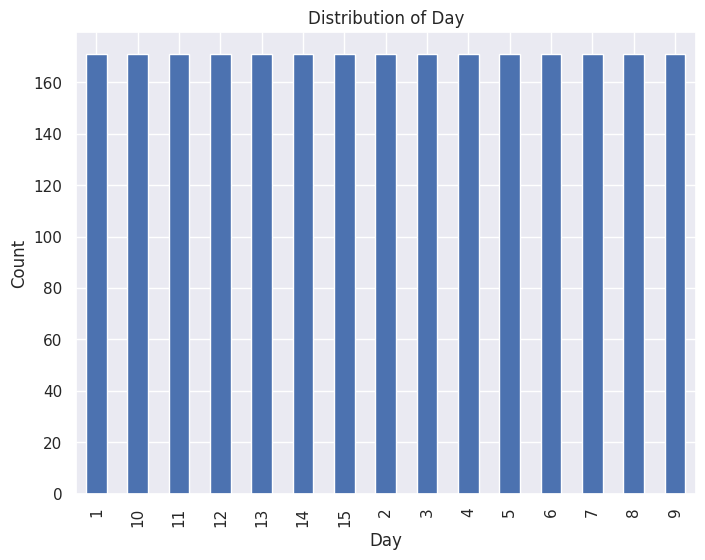

In [ ]:
# what is the distribution of day in this dataset
plt.figure(figsize=(8, 6))
df['day'].value_counts().plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Day')
plt.show()

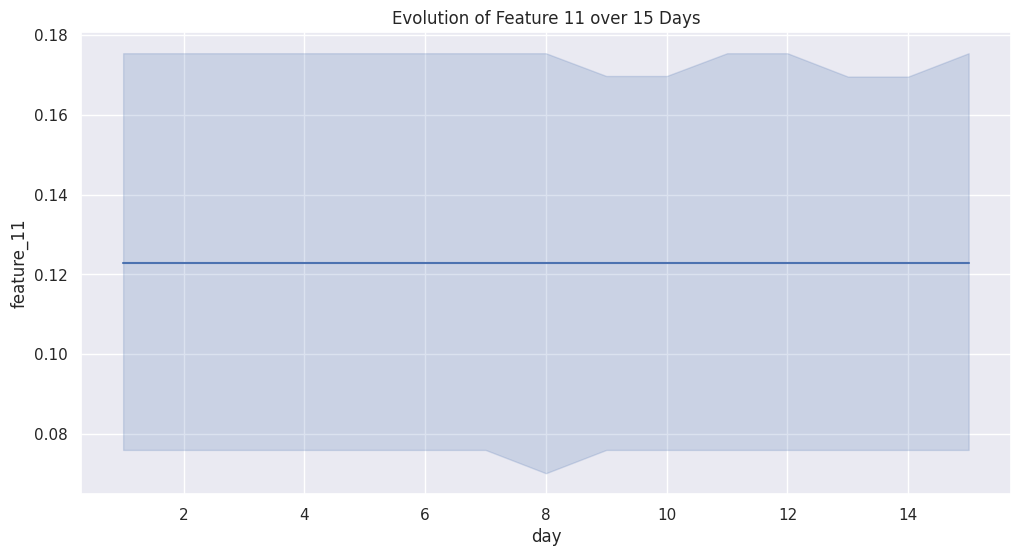

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='feature_11', data=df)
plt.title('Evolution of Feature 11 over 15 Days')
plt.show()

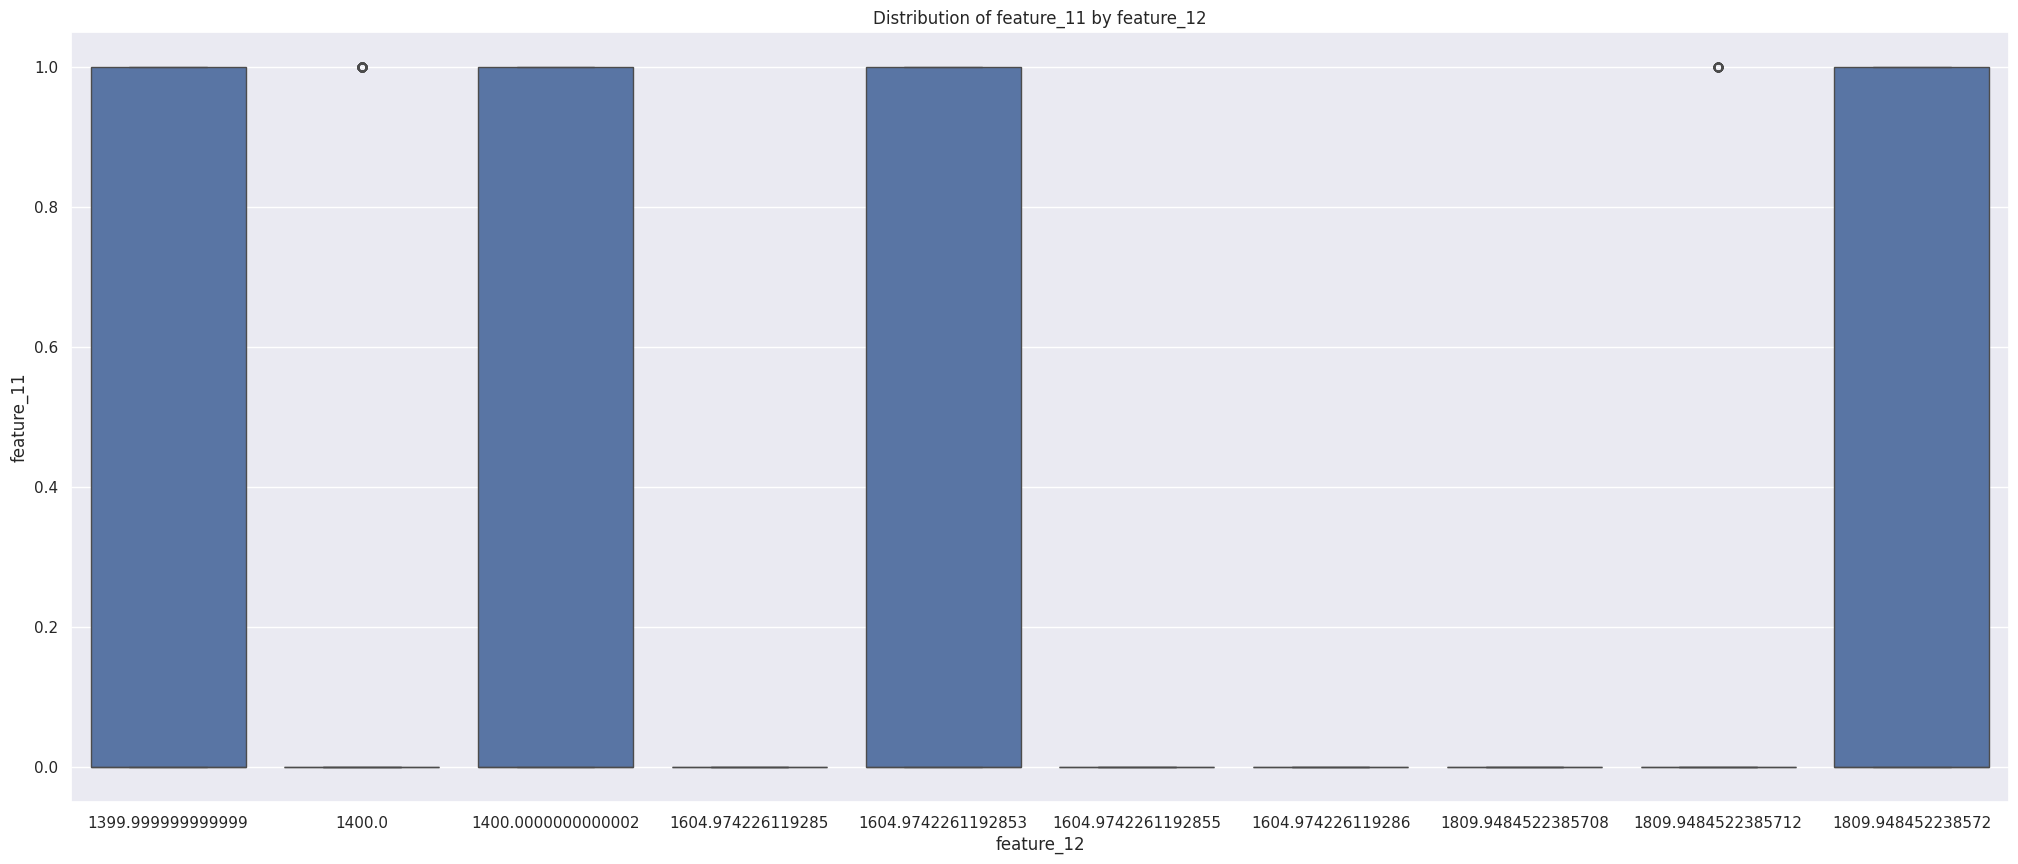

In [ ]:
#How does feature_11 vary across different values of feature_12?
sns.boxplot(x='feature_12', y='feature_11', data=df)
plt.xlabel('feature_12')
plt.ylabel('feature_11')
plt.title('Distribution of feature_11 by feature_12')
plt.show()

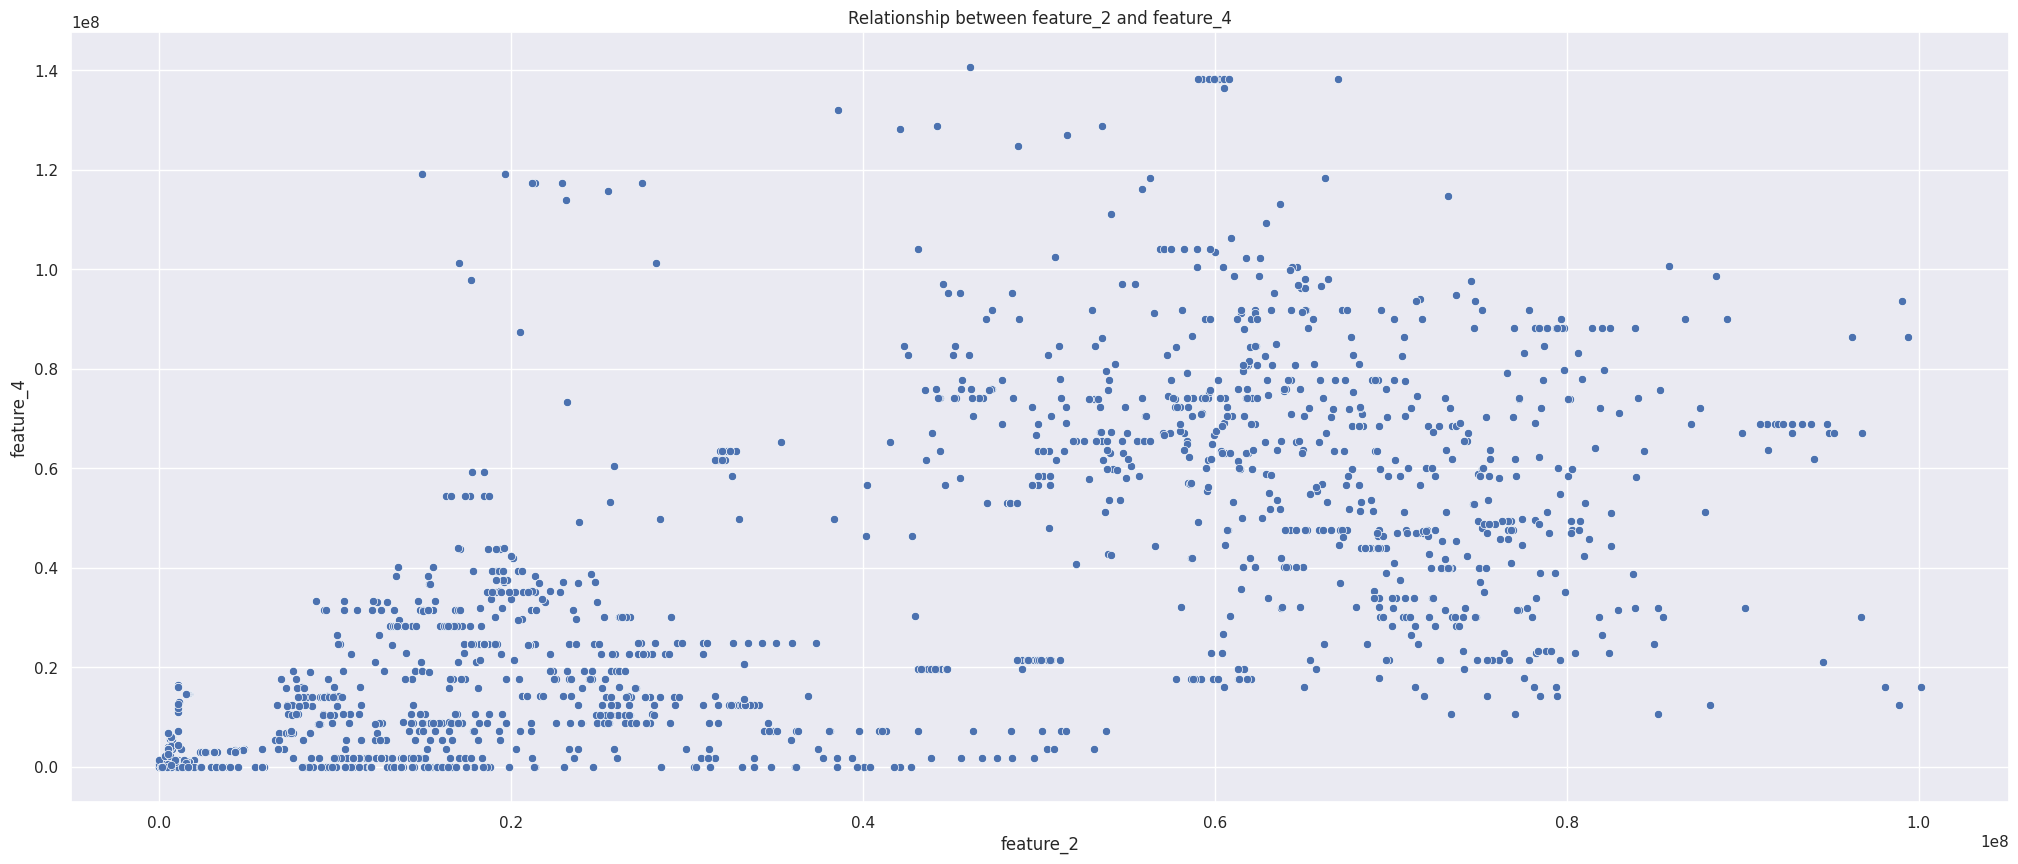

In [ ]:
# is there relationship between feature_2 and feature_4
sns.scatterplot(x='feature_2', y='feature_4', data=df)
plt.xlabel('feature_2')
plt.ylabel('feature_4')
plt.title('Relationship between feature_2 and feature_4')
plt.show()

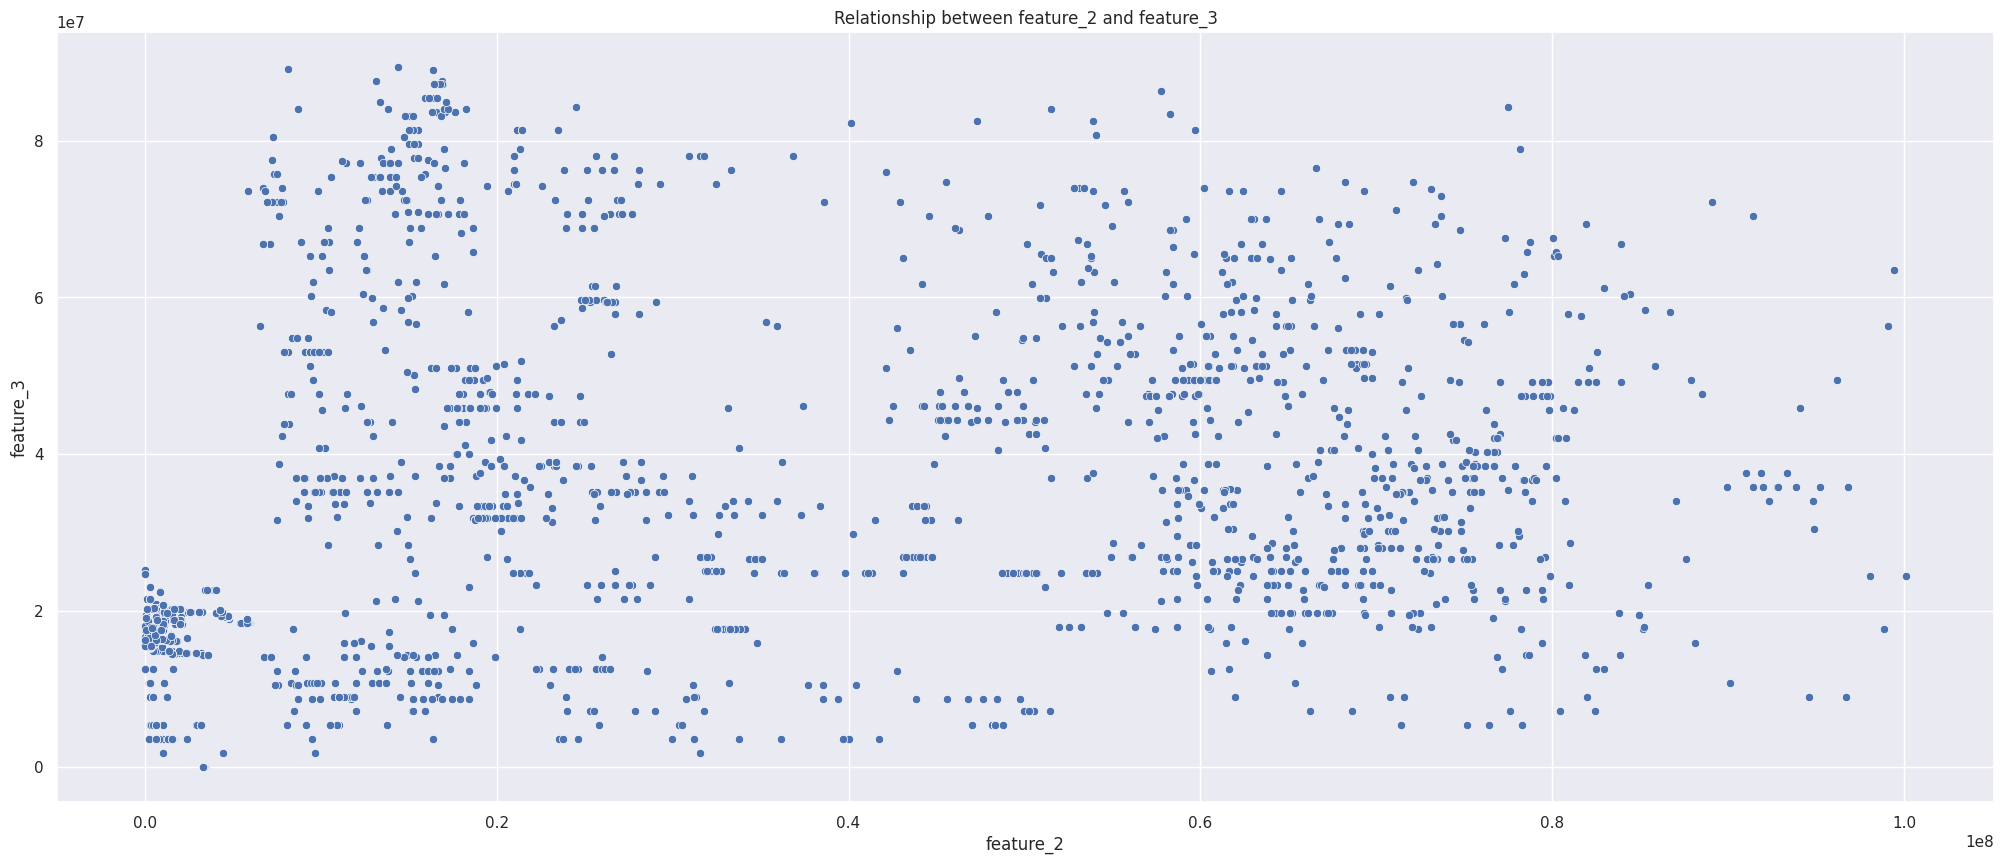

In [ ]:
# is there relationship between feature_2 and feature_3
sns.scatterplot(x='feature_2', y='feature_3', data=df)
plt.xlabel('feature_2')
plt.ylabel('feature_3')
plt.title('Relationship between feature_2 and feature_3')
plt.show()
#

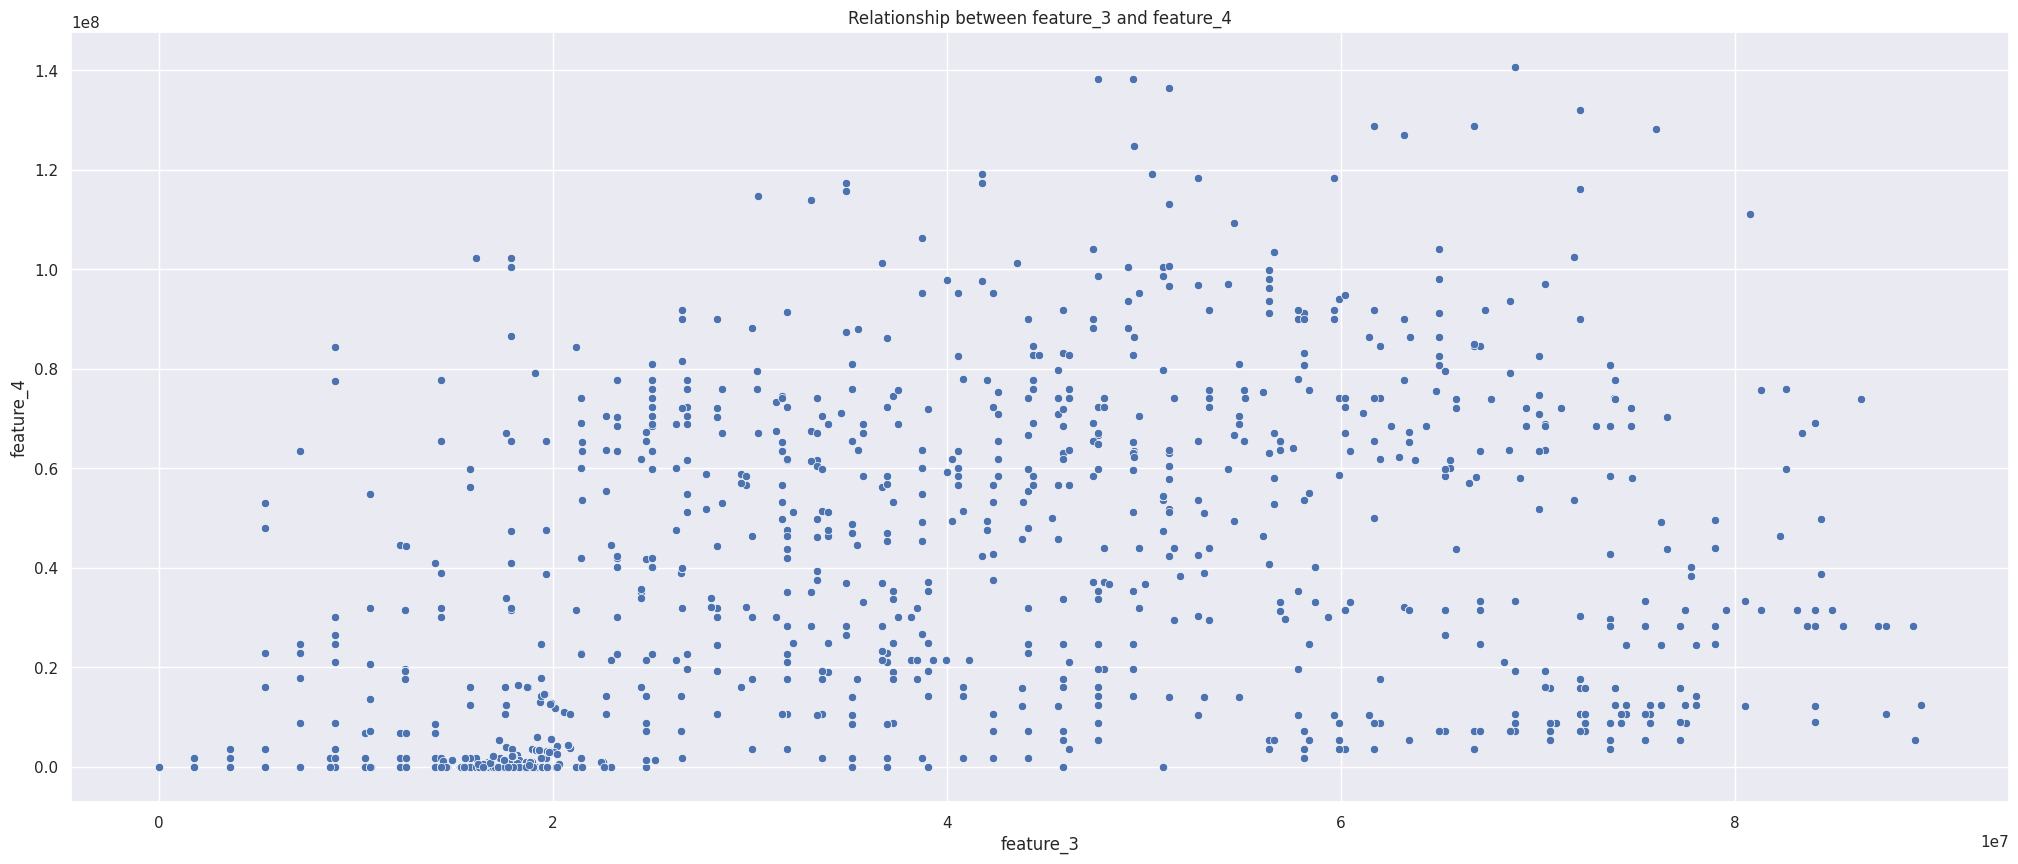

In [ ]:
# is there relationship between feature_3 and feature_4
sns.scatterplot(x='feature_3', y='feature_4', data=df)
plt.xlabel('feature_3')
plt.ylabel('feature_4')
plt.title('Relationship between feature_3 and feature_4')
plt.show()
#

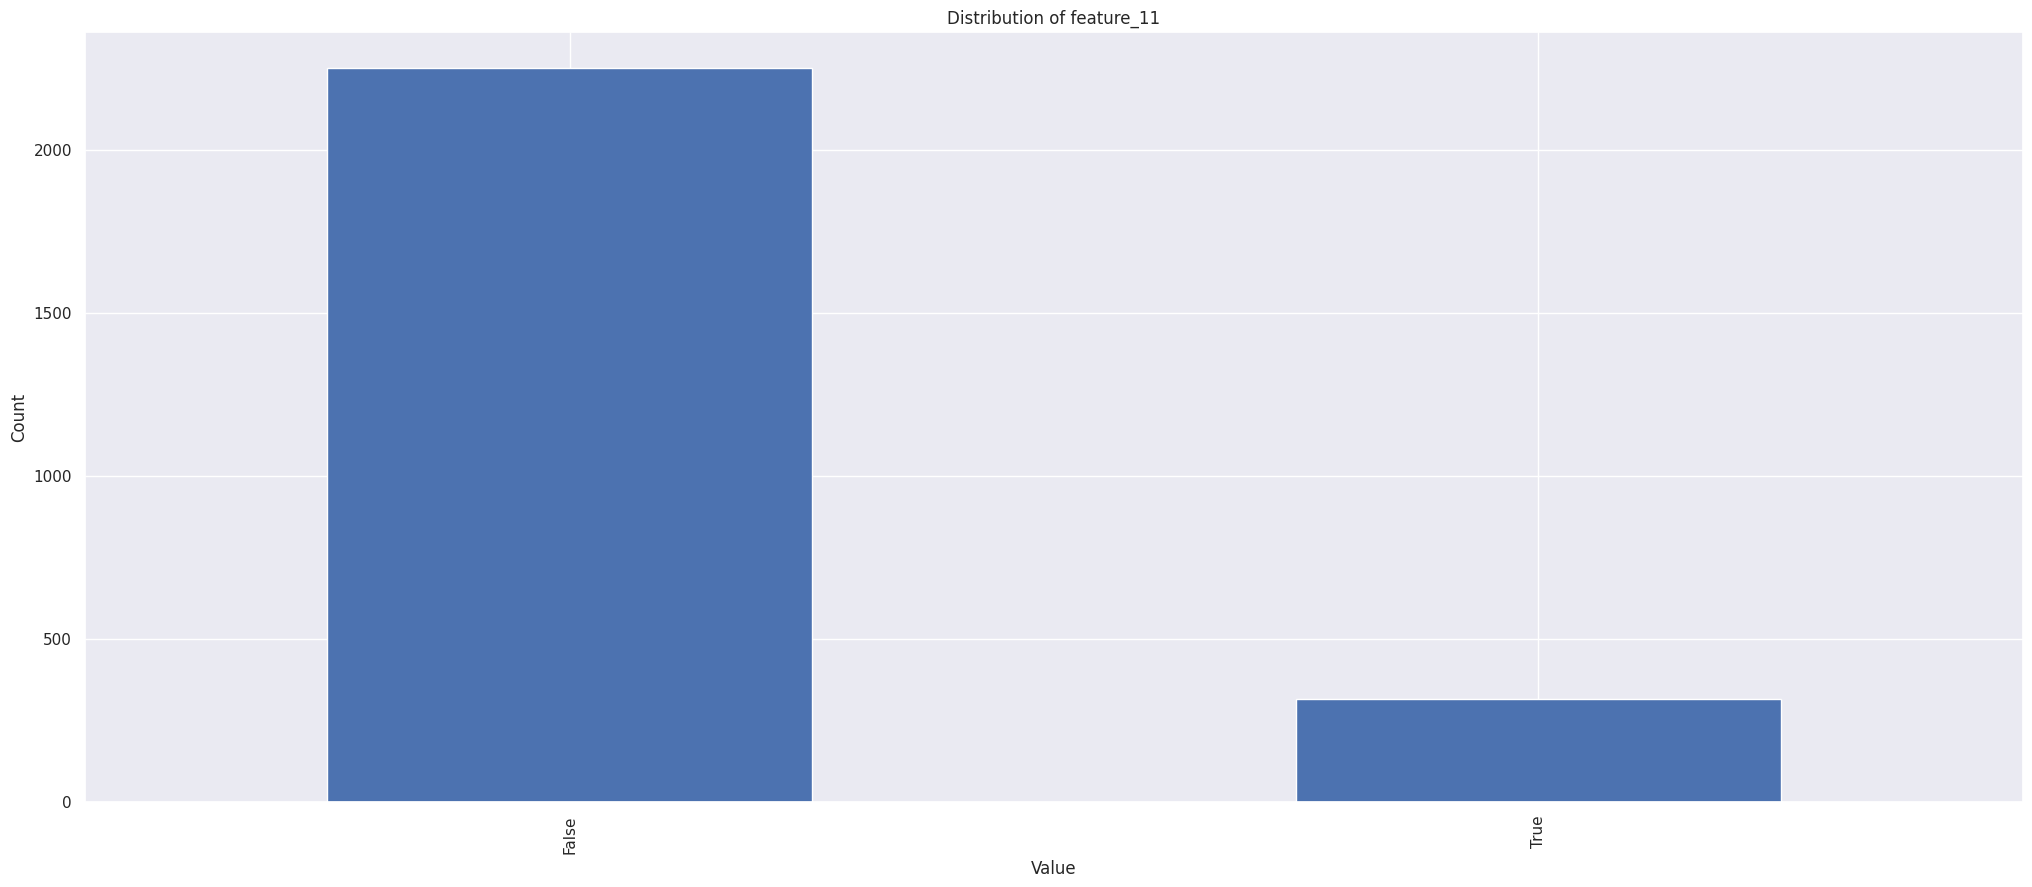

In [ ]:
# What is the proportion of True and False values in the feature_9 ?
df['feature_11'].value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of feature_11')
plt.show()

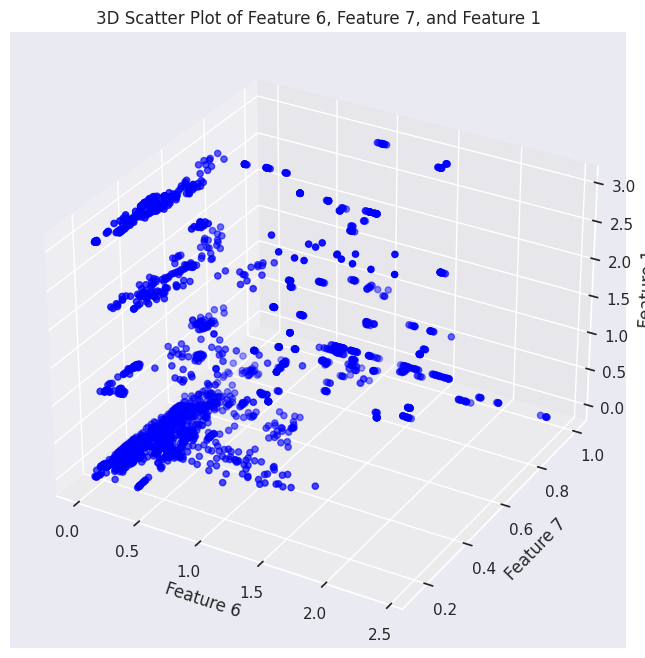

In [ ]:
# How do the features feature_6 and feature_7 vary across different levels of feature_1?
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature_6'], df['feature_7'], df['feature_1'], c='blue', marker='o')
ax.set_xlabel('Feature 6')
ax.set_ylabel('Feature 7')
ax.set_zlabel('Feature 1')

plt.title('3D Scatter Plot of Feature 6, Feature 7, and Feature 1')
plt.show()

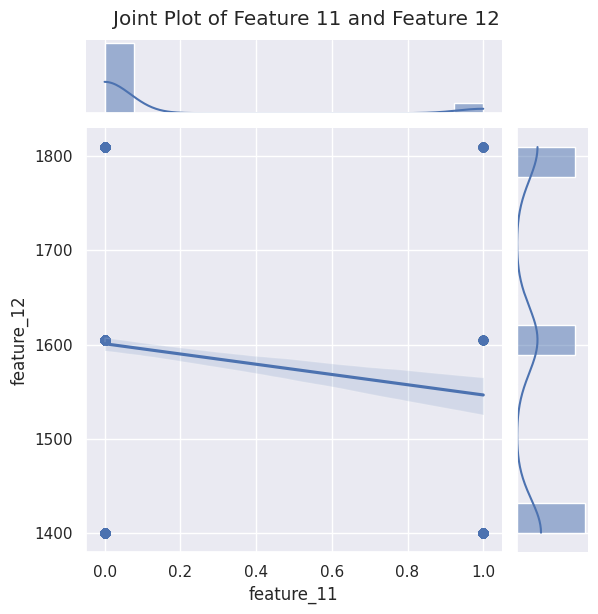

In [ ]:
#  relationship between feature_11 and feature_12 using a joint plot with a regression line?
sns.jointplot(x='feature_11', y='feature_12', data=df, kind='reg')
plt.suptitle('Joint Plot of Feature 11 and Feature 12', y=1.02)
plt.show()

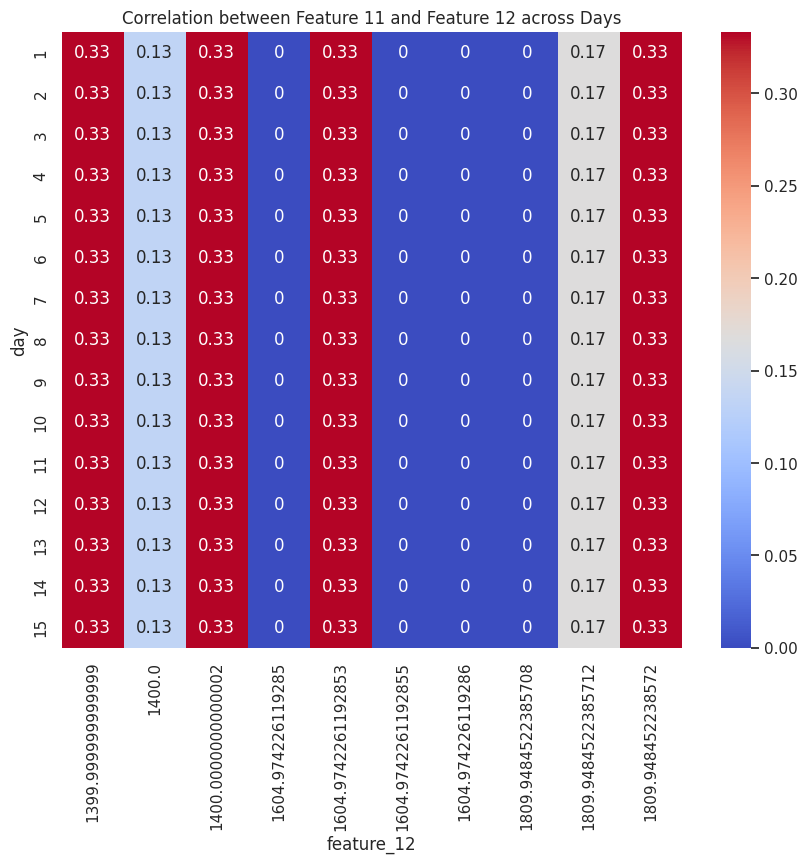

In [ ]:
# Is there a correlation between feature_11 and feature_12 across different days in the dataset?
# create a pivot table to calcualte the correlation across days
pivot_table = df.pivot_table(index='day', columns='feature_12', values=['feature_11'], aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table['feature_11'], cmap='coolwarm', annot=True)
plt.title('Correlation between Feature 11 and Feature 12 across Days')
plt.show()

# Data preprocessing

There is no missing and duplicated values

When developing your model, you’ll use data from Day N to predict features on Day N+1

In [ ]:
# lagged features refer to past values of variable used to predict furure values of the same variable
df['feature_11_next'] = df.groupby('cell_id')['feature_11'].shift(-1)
df['feature_12_next'] = df.groupby('cell_id')['feature_12'].shift(-1)

In [ ]:
df.head()

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,day,feature_11_next,feature_12_next
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,7.0,5.628882e+07,5.376503e+06,0.020885,0.214286,5.803571e+07,0.183350,1,True,1400.0
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,9.0,1.448893e+07,2.624299e+03,0.000253,0.142857,8.125000e+07,0.000008,1,False,1400.0
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,4.0,4.619858e+06,2.142543e+02,0.000044,0.142857,1.142857e+08,0.000146,1,False,1400.0
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,6.0,7.812001e+07,1.937496e+03,0.189714,0.071429,5.803571e+07,0.028831,1,True,1400.0
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,9.0,8.155186e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000224,1,False,1400.0


 Encode categorical columns

In [ ]:
label_encoder = LabelEncoder()
df['feature_11'] = label_encoder.fit_transform(df['feature_11'])
df['feature_11_next'] = label_encoder.fit_transform(df['feature_11_next'])

In [ ]:
df.head()

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,day,feature_11_next,feature_12_next
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,7.0,5.628882e+07,5.376503e+06,0.020885,0.214286,5.803571e+07,0.183350,1,1,1400.0
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,9.0,1.448893e+07,2.624299e+03,0.000253,0.142857,8.125000e+07,0.000008,1,0,1400.0
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,4.0,4.619858e+06,2.142543e+02,0.000044,0.142857,1.142857e+08,0.000146,1,0,1400.0
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,6.0,7.812001e+07,1.937496e+03,0.189714,0.071429,5.803571e+07,0.028831,1,1,1400.0
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,9.0,8.155186e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000224,1,0,1400.0


In [ ]:
# Drop rows where we don't have a next day.
df = df.dropna(subset=['feature_11_next', 'feature_12_next'])
df.head()

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,day,feature_11_next,feature_12_next
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,7.0,5.628882e+07,5.376503e+06,0.020885,0.214286,5.803571e+07,0.183350,1,1,1400.0
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,9.0,1.448893e+07,2.624299e+03,0.000253,0.142857,8.125000e+07,0.000008,1,0,1400.0
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,4.0,4.619858e+06,2.142543e+02,0.000044,0.142857,1.142857e+08,0.000146,1,0,1400.0
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,6.0,7.812001e+07,1.937496e+03,0.189714,0.071429,5.803571e+07,0.028831,1,1,1400.0
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,9.0,8.155186e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000224,1,0,1400.0


In [ ]:
df.drop('cell_id', axis=1, inplace=True)

In [ ]:
x = df.drop(columns=['feature_11_next', 'feature_12_next', 'feature_11', 'feature_12'])
y = df[['feature_11_next', 'feature_12_next']]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_x)
x_test_scaled = scaler.transform(test_x)

# Modeling

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled, train_y)

RandomForestRegressor(random_state=42)

In [134]:
y_train_pred = model.predict(train_x)
y_test_pred = model.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [137]:
train_r2 = r2_score(train_y, y_train_pred)
test_r2 = r2_score(test_y, y_test_pred)

# Print the R-squared values
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")

Training R-squared: -0.5904974949495515
Testing R-squared: -0.5911527975479905


In [142]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_scaled, train_y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print("Best R-squared Score:")
print(best_score)

Best Parameters:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared Score:
0.994329924101278


Training each model seperately (feature_11 & feature_12).

In [141]:
# Train a separate model for feature_11
model_feature_11 = GradientBoostingRegressor()
model_feature_11.fit(x_train_scaled, train_y['feature_11_next'])
predictions_feature_11 = model_feature_11.predict(x_test_scaled)
r2_feature_11 = r2_score(test_y['feature_11_next'], predictions_feature_11)

# Train a separate model for feature_12
model_feature_12 = GradientBoostingRegressor()
model_feature_12.fit(x_train_scaled, train_y['feature_12_next'])
predictions_feature_12 = model_feature_12.predict(x_test_scaled)
r2_feature_12 = r2_score(test_y['feature_12_next'], predictions_feature_12)

print(f'R-squared for feature_11: {r2_feature_11}')
print(f'R-squared for feature_12: {r2_feature_12}')

R-squared for feature_11: 0.9337249647491246
R-squared for feature_12: 0.9995607009461821
